# Dfsu and Mesh - Plotting
Demonstrate different ways of plotting dfsu and mesh files. This includes plotting

* outline_only
* mesh_only
* patch - similar to MIKE Zero box contour)
* contour - contour lines
* contourf - filled contours
* shaded

In [1]:
from mikeio import Mesh, Dfsu
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
plt.rcParams["figure.figsize"] = (10,8)

# Load dfsu file as mesh

In [2]:
filename = '../tests/testdata/FakeLake.dfsu'
msh = Mesh(filename)
msh

Mesh
Number of elements: 1011
Number of nodes: 798
Projection: PROJCS["UTM-17",GEOGCS["Unused",DATUM["UTM Projections",SPHEROID["WGS 1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000],PARAMETER["False_Northing",0],PARAMETER["Central_Meridian",-81],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0],UNIT["Meter",1]]

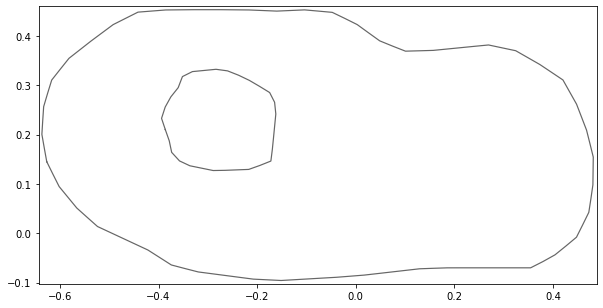

In [3]:
msh.plot(plot_type='outline_only');

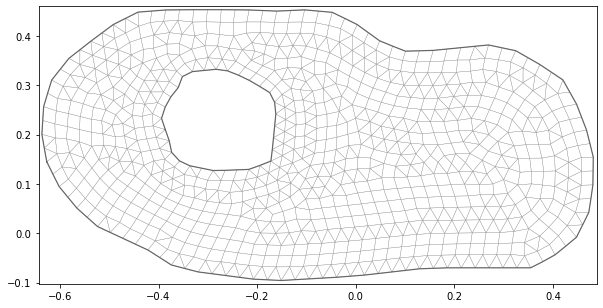

In [4]:
msh.plot(plot_type='mesh_only');

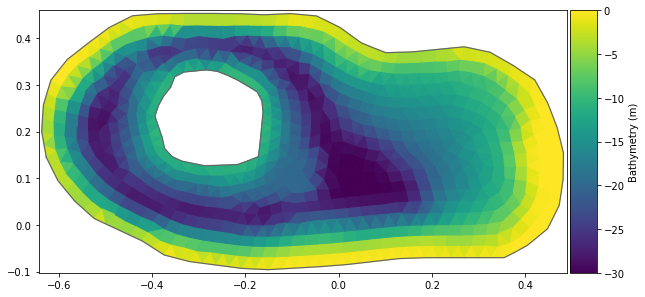

In [5]:
msh.plot(plot_type='patch', show_mesh=False, vmin=-30);

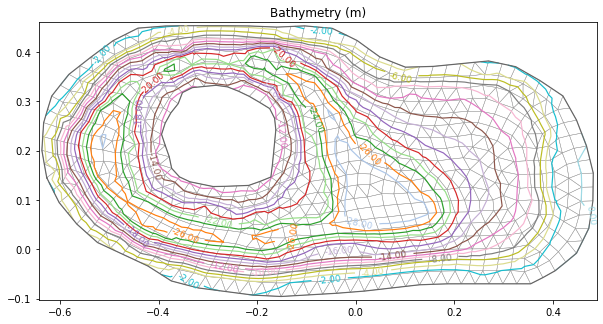

In [6]:
msh.plot(plot_type='contour', show_mesh=True, levels=16, cmap='tab20', vmin=-30);

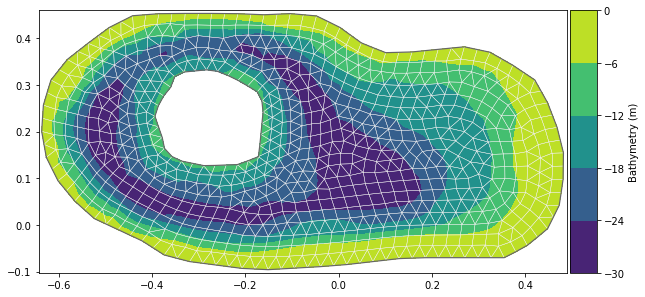

In [7]:
msh.plot(plot_type='contourf', show_mesh=True, levels=6, vmin=-30);

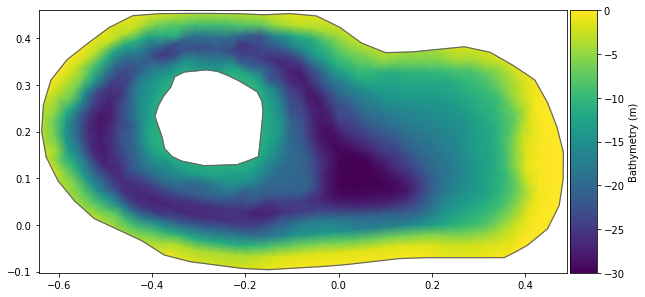

In [8]:
msh.plot(plot_type='shaded', show_mesh=False, vmin=-30);

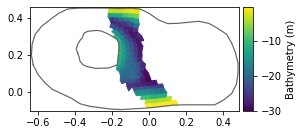

In [9]:
msh.plot(plot_type='patch', elements=range(400,600), show_mesh=False, vmin=-30, figsize=(4,6));

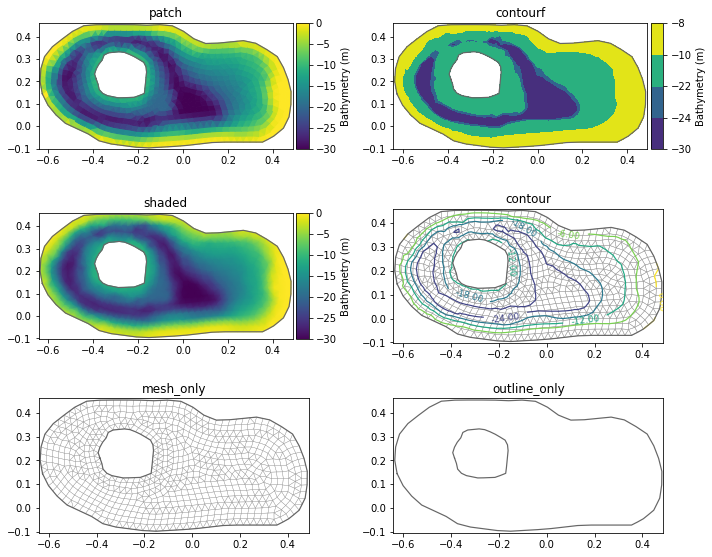

In [10]:
fig, ax = plt.subplots(3,2)

msh.plot(plot_type='patch', title='patch', show_mesh=False, ax=ax[0,0]);
msh.plot(plot_type='contourf', title='contourf', show_mesh=False, levels=[-30,-24,-22,-10,-8], ax=ax[0,1]);
msh.plot(plot_type='shaded', title='shaded', show_mesh=False, ax=ax[1,0]);
msh.plot(plot_type='contour', title='contour', show_mesh=True, levels=6, vmin=-30, ax=ax[1,1]);
msh.plot(plot_type='mesh_only', title='mesh_only', ax=ax[2,0]);
msh.plot(plot_type='outline_only', title='outline_only', ax=ax[2,1]);

plt.tight_layout()

# Plot data from surface layer of 3d dfsu file

In [11]:
filename = "../tests/testdata/oresund_sigma_z.dfsu"
dfs = Dfsu(filename)
dfs

Dfsu3DSigmaZ
Number of elements: 17118
Number of nodes: 12042
Projection: UTM-33
Number of sigma layers: 4
Max number of z layers: 5
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)
Time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

In [12]:
ds = dfs.read(items="Salinity", elements=dfs.top_elements, time_steps=0)
ds

100%|██████████| 1/1 [00:00<00:00, 200.11it/s]


<mikeio.DataSet>
Dimensions: (1, 3700)
Time: 1997-09-15 21:00:00 - 1997-09-15 21:00:00
Items:
  0:  Salinity <Salinity> (PSU)

In [13]:
dat = ds.data[0][0,:]

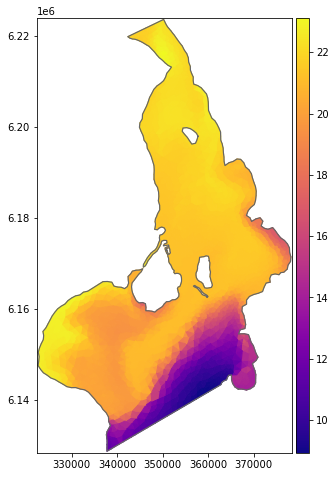

In [14]:
dfs.plot(dat, plot_type='patch', elements=dfs.top_elements, show_mesh=False, cmap='plasma');

(6135000.0, 6160000.0)

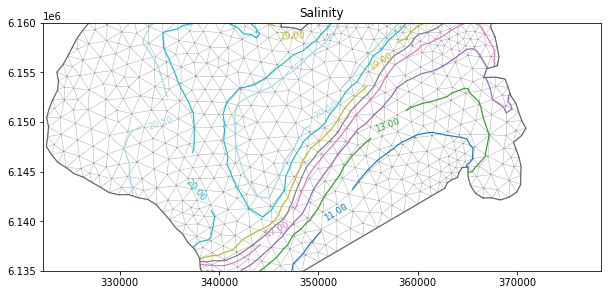

In [15]:
ax = dfs.plot(dat, plot_type='contour', elements=dfs.top_elements, show_mesh=True, cmap='tab20', label='Salinity', levels=[11,13,15,17,18,19,20,20.5])
ax.set_ylim(6135000,6160000)

# plot data from a z-layer

In [16]:
elem_ids = dfs.get_layer_elements(4)
ds = dfs.read(items="Salinity", elements=elem_ids, time_steps=0)

100%|██████████| 1/1 [00:00<?, ?it/s]


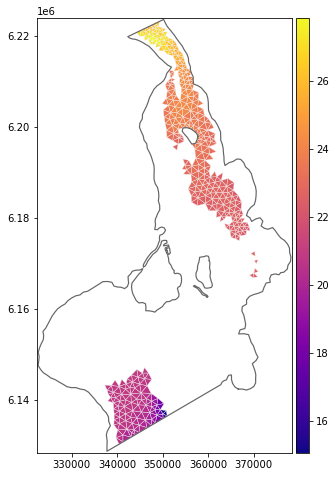

In [17]:
dfs.plot(ds[0][0,:], elements=elem_ids, cmap='plasma');